 K-means clustering alrorithm using Oversampling technique 

In [101]:
# Required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation as LDA
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [125]:
###preprocessing step applied and saved data in the same excel.


# Load stop words
# stop_words_path = "/home/aayushivt/Master_thesis/stopwords.txt"  # Update with the actual path to your stop words file
# with open(stop_words_path, 'r') as file:
#     stop_words = set(word.strip().lower() for word in file.read().splitlines())

# # Load Excel data
# df = pd.read_excel("/home/aayushivt/Master_thesis/finalized_data.xlsx")

# # Remove stop words from 'cleaned_feedback' column
# def remove_stop_words(text, stop_words):
#     if isinstance(text, str):
#         return ' '.join([word for word in text.split() if word.lower() not in stop_words])
#     return ''

# # Apply stop word removal and join text
# df['stop_feedback'] = df['cleaned_feedback'].apply(lambda x: remove_stop_words(x, stop_words))

# # check if the stop words have been removed
# print(df['stop_feedback'].head())

# # Save processed data back to the original Excel file
# df.to_excel("/home/aayushivt/Master_thesis/finalized_data.xlsx", index=False)


In [126]:
#Load data
df = pd.read_excel("/home/aayushivt/Master_thesis/finalized_data.xlsx")

#check for missing values 
df.isnull().sum()

Id                  0
user_id             0
ship_id             0
datetime            0
score               0
feedback            0
feedback_english    1
cleaned_feedback    0
stop_feedback       0
dtype: int64

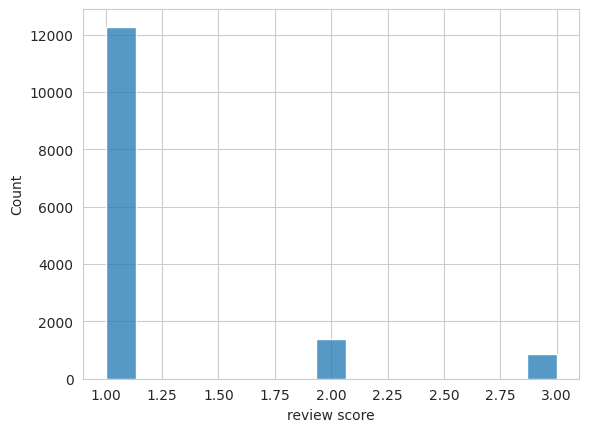

In [116]:
sns.set_style("whitegrid")

# Plot the histogram with grid
sns.histplot(data=df, x="score")
plt.xlabel('review score')
plt.show()

In [117]:
# Select the relevant columns
feedbacks = df['stop_feedback']
labels = df['score']

/tmp/ipykernel_153/2116314124.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='score', data=df_resampled, palette='viridis')


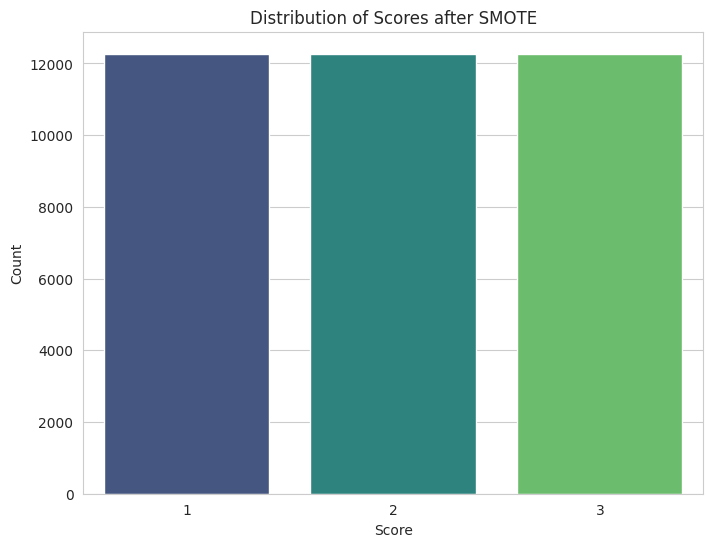

In [118]:
# # Text preprocessing using TF-IDF vectorization
# vectorizer = TfidfVectorizer(max_features=5000)
# X = vectorizer.fit_transform(feedbacks).toarray()

# # Handle data imbalance using SMOTE
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, labels)


# # Plot the new count of each label (score) after SMOTE
# plt.figure(figsize=(8, 6))
# sns.countplot(x='score', data=df_resampled, palette='viridis')
# plt.xlabel('Score')
# plt.ylabel('Count')
# plt.title('Distribution of Scores after SMOTE')
# plt.show()


# Text preprocessing using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(feedbacks).toarray()

# Handle data imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, labels)

# Create a DataFrame for the resampled labels
df_resampled = pd.DataFrame({'score': y_resampled})

# Plot the new count of each label (score) after SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=df_resampled, palette='viridis')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores after SMOTE')
plt.show()


/tmp/ipykernel_153/1031894877.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_clusters, palette='viridis')


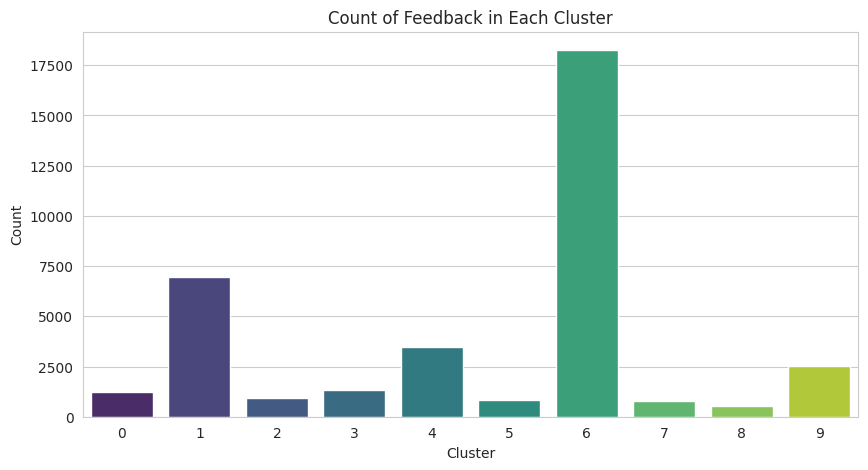

In [123]:

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Clustering with K-means
kmeans = KMeans(n_clusters=10, random_state=4)
kmeans.fit(X_pca)
clusters = kmeans.labels_

# Adding clusters to data
df_clusters = pd.DataFrame({'PC1': X_pca[:, 0], 'PC2': X_pca[:, 1], 'Cluster': clusters})

# Plotting the cluster distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster', data=df_clusters, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Count of Feedback in Each Cluster')
plt.show()

Topic 1: think mhndasmayladam service continue system stupid alright sea problems internet quick far well plis laggy signal fast no so all wifi cool money costs not yes really its very good
Topic 2: service paid speed boat its already pls would not are ship much there we best should pay better price miranlatzkogmailcom money why cost free connection internet wifi great nice no
Topic 3: 24 whole find this like only number do problem hours get 30 can found trip why there ticket internet make no not shit where should what voucher code wifi free
Topic 4: why gud failed sad realy much tofuseup videos thats password sucks fucking wifi right lovely so very its short gg god fuck now way fi wi slow too expensive ok
Topic 5: click just fun loading internet all press this would properly loaded cant connect not button buy stripe confirm amazing pay let so love wifi wont super like work slow doesnt
Topic 6: barely night open karbiagofrane6gmailcom good brava philip web lost kind at all only because

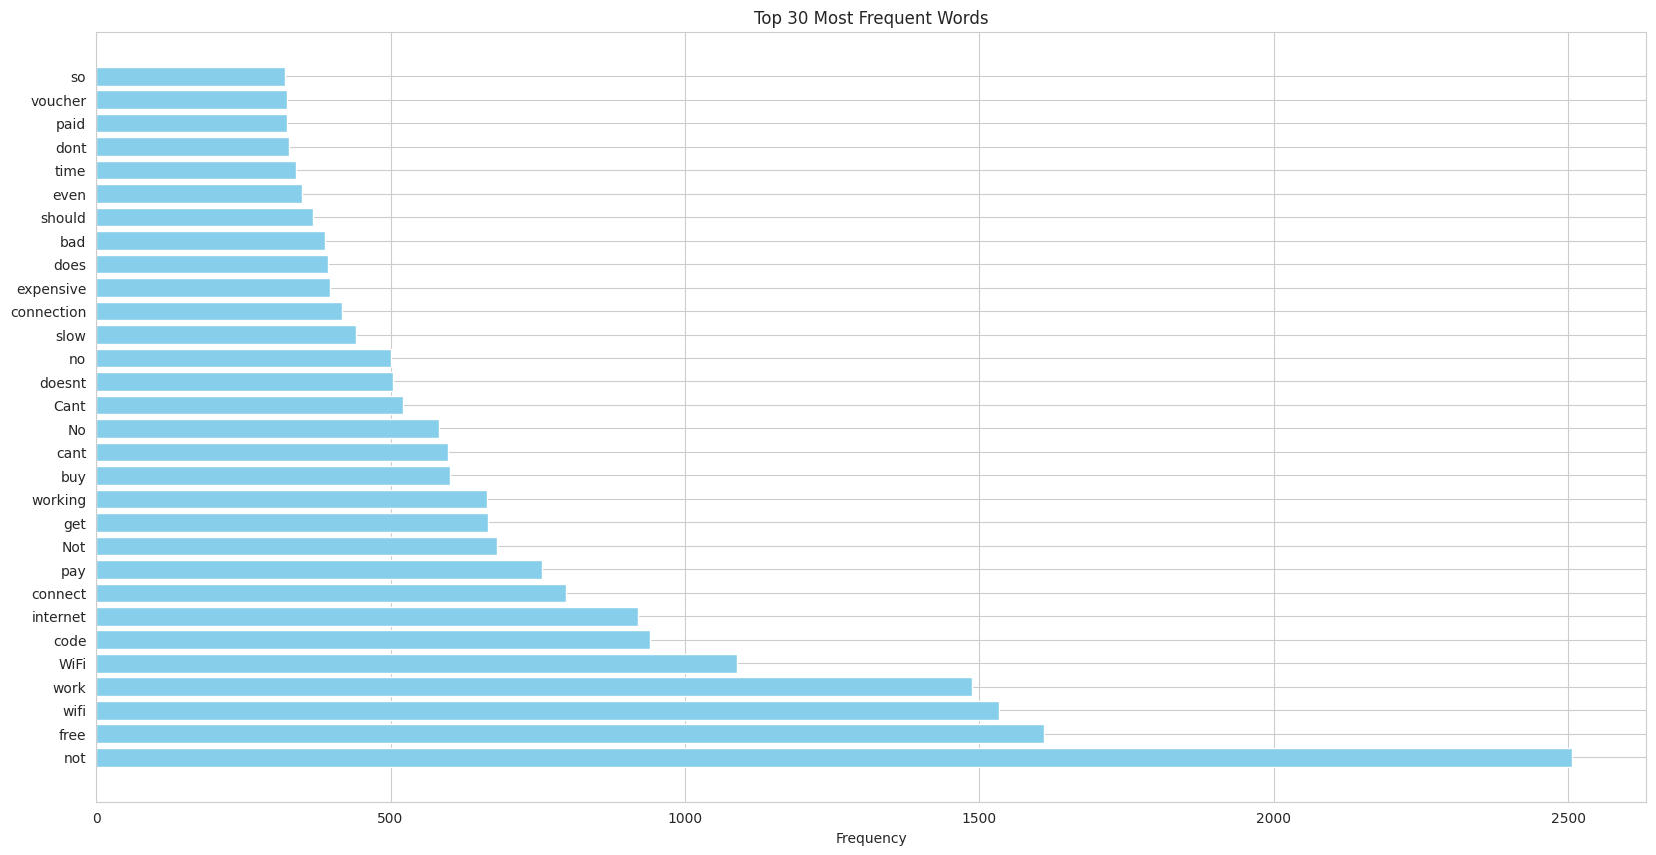

In [124]:
# Topic Modeling with LDA
lda = LDA(n_components=10, random_state=4)
lda.fit(X_resampled)
topic_words = lda.components_
# Display topics
n_top_words = 30
feature_names = vectorizer.get_feature_names_out()
for i, topic in enumerate(topic_words):
    top_words = [feature_names[i] for i in topic.argsort()[-n_top_words:]]
    print(f"Topic {i+1}: {' '.join(top_words)}")

# Frequent Word Analysis
all_words = ' '.join(feedbacks).split()
most_common = Counter(all_words).most_common(30)

# Plotting word frequency with adjusted figure size
plt.figure(figsize=(20, 10))
words, counts = zip(*most_common)
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 30 Most Frequent Words')
plt.show()


Use Undersampling for K-means clustering algorithm

In [128]:
from imblearn.under_sampling import RandomUnderSampler

# Select only relevant columns
df_relevant = df[['score', 'stop_feedback']]

# Define X and y for undersampling
X = df_relevant[['stop_feedback']]
y = df_relevant['score']

# Perform undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new DataFrame from the resampled data
df_resampled = pd.DataFrame({'score': y_resampled, 'stop_feedback': X_resampled['stop_feedback']})


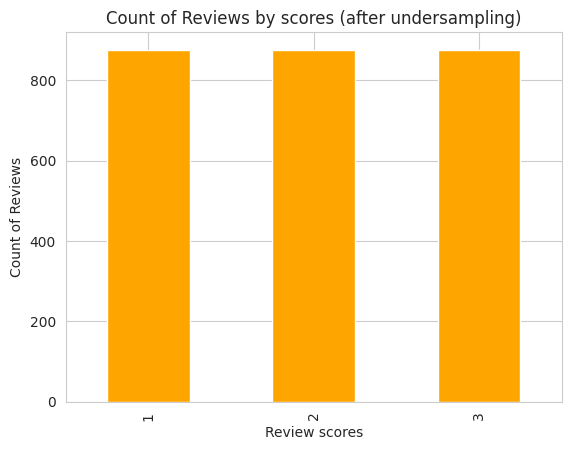

In [130]:
# Plot of RandomUnderSampler

import matplotlib.pyplot as plt

df_resampled['score'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.xlabel('Review scores')
plt.ylabel('Count of Reviews')
plt.title('Count of Reviews by scores (after undersampling)')
plt.show()

In [143]:
# Preprocess and apply K-means clustering

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_vectors = vectorizer.fit_transform(df_resampled['stop_feedback'])

# Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_vectors)

# Add the cluster labels to the DataFrame
df_resampled['cluster'] = kmeans.labels_


In [145]:
# Analyze the clusters

# Get terms and centroids
terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

# Display top terms per cluster
for i in range(10):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(f' {terms[ind]}')


Cluster 0:
 wifi
 like
 code
 buy
 bad
 connect
 need
 expensive
 want
 working
Cluster 1:
 internet
 ok
 code
 working
 expensive
 bad
 wifi
 buy
 connect
 voucher
Cluster 2:
 free
 wifi
 internet
 need
 make
 longer
 time
 want
 just
 fi
Cluster 3:
 pay
 wifi
 paypal
 internet
 want
 ideal
 stripe
 free
 ridiculous
 connect
Cluster 4:
 work
 doesnt
 does
 didnt
 code
 did
 wifi
 just
 voucher
 dosnt
Cluster 5:
 slow
 bit
 wifi
 internet
 connection
 bad
 really
 people
 necessary
 ffffffff
Cluster 6:
 good
 wifi
 service
 quality
 trip
 problems
 really
 initiative
 rekomebdit
 signalo
Cluster 7:
 log
 code
 option
 wifi
 easily
 innnnn
 allowing
 voucher
 hour
 inb
Cluster 8:
 purchase
 stripe
 error
 loaded
 says
 load
 message
 saying
 complete
 properly
Cluster 9:
 dont
 know
 internet
 wifi
 code
 work
 understand
 voucher
 pay
 like


In [146]:
# Analyze frequent words

# Get all words
all_words = ' '.join(df_resampled['stop_feedback']).split()
word_counts = Counter(all_words)

# Display most common words
print("Most common words:")
for word, count in word_counts.most_common(30):
    print(f'{word}: {count}')


Most common words:
wifi: 283
not: 269
free: 248
WiFi: 165
internet: 151
work: 148
good: 139
code: 138
get: 99
slow: 92
pay: 91
Not: 89
cant: 87
buy: 76
very: 76
should: 73
no: 71
so: 70
working: 67
connect: 66
dont: 65
Its: 64
Very: 63
expensive: 60
No: 60
do: 60
Cant: 59
time: 58
connection: 57
doesnt: 54


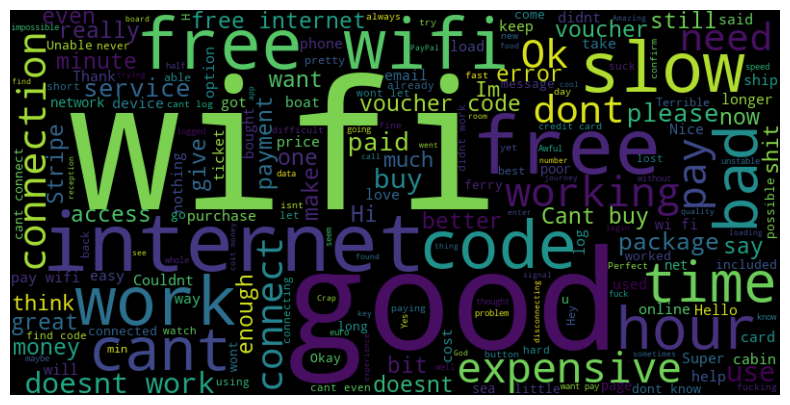

In [147]:
# Visualize the results
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df_resampled['stop_feedback']))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
